In [1]:
import pandas as pd
import numpy as np

In [28]:
br_df = pd.read_csv('BlueOrRed.csv')

In [11]:
br_df.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,51,1,1,1,4,171.0,15,0,1
1,46,1,1,1,6,420.0,15,1,0
2,55,1,0,1,6,132.0,16,0,1
3,50,1,0,1,4,18.0,8,0,0
4,49,1,1,1,2,66.0,15,1,1


In [12]:
br_df.isna().sum()

Age              0
HomeOwner        0
Female           0
Married          0
HouseholdSize    0
Income           0
Education        0
Church           0
Undecided        0
dtype: int64

In [14]:
br_df.dropna().isna().sum()

Age              0
HomeOwner        0
Female           0
Married          0
HouseholdSize    0
Income           0
Education        0
Church           0
Undecided        0
dtype: int64

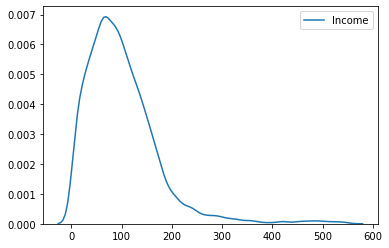

In [32]:
import seaborn as sns
sns.kdeplot(br_df['Income'])

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
br_df[['Age','Income']] = scaler.fit_transform(br_df[['Age','Income']])

In [34]:
br_df.head()

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,0.523810,1,1,1,4,0.306422,15,0,1
1,0.444444,1,1,1,6,0.763303,15,1,0
2,0.587302,1,0,1,6,0.234862,16,0,1
3,0.507937,1,0,1,4,0.025688,8,0,0
4,0.492063,1,1,1,2,0.113761,15,1,1


In [49]:
from sklearn.model_selection import train_test_split
X = br_df.iloc[:,:-1].values
y = br_df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 8)
(7000,)
(3000, 8)
(3000,)


In [55]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier()
tree1.fit(X_train,y_train)
y_train_pred = tree1.predict(X_train)
y_test_pred = tree1.predict(X_test)

In [58]:
print(y_train_pred[:100])

[0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1]


In [59]:
print(y_test_pred[:100])

[0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0]


In [63]:
from sklearn.metrics import accuracy_score
print('Train:',accuracy_score(y_train,y_train_pred))
print('Test:',accuracy_score(y_test,y_test_pred))

Train: 1.0
Test: 0.9666666666666667


In [65]:
print('Train:',tree1.score(X_train,y_train)) 
print('Test:',tree1.score(X_test,y_test))

Train: 1.0
Test: 0.9666666666666667


In [68]:
from sklearn.metrics import zero_one_loss
print('Train:',zero_one_loss(y_train,y_train_pred))
print('Test:',zero_one_loss(y_test,y_test_pred))

Train: 0.0
Test: 0.033333333333333326


In [70]:
from sklearn.metrics import classification_report
print('Train:',classification_report(y_train,y_train_pred))
print('Test:',classification_report(y_test,y_test_pred))

Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4172
           1       1.00      1.00      1.00      2828

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

Test:               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1814
           1       0.95      0.97      0.96      1186

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [71]:
from sklearn.metrics import confusion_matrix
print('Train:',confusion_matrix(y_train,y_train_pred))
print('Test:',confusion_matrix(y_test,y_test_pred))

Train: [[4172    0]
 [   0 2828]]
Test: [[1755   59]
 [  41 1145]]


In [72]:
from sklearn.metrics import precision_score
print('Train:',precision_score(y_train,y_train_pred))
print('Test:',precision_score(y_test,y_test_pred))

Train: 1.0
Test: 0.9509966777408638


In [73]:
from sklearn.metrics import recall_score
print('Train:',recall_score(y_train,y_train_pred))
print('Test:',recall_score(y_test,y_test_pred))

Train: 1.0
Test: 0.9654300168634065


In [76]:
from sklearn.metrics import f1_score
print('Train:',f1_score(y_train,y_train_pred))
print('Test:',f1_score(y_test,y_test_pred))

Train: 1.0
Test: 0.9581589958158997


In [79]:
br_df['Undecided'].value_counts()

0    5986
1    4014
Name: Undecided, dtype: int64

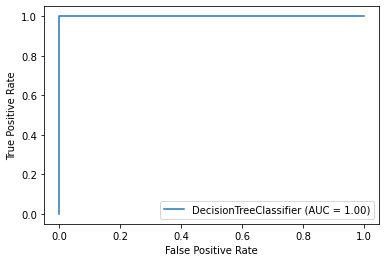

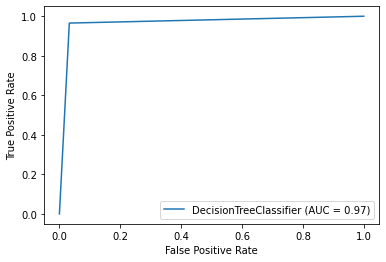

In [83]:
from sklearn.metrics import plot_roc_curve
print(plot_roc_curve(tree1,X_train,y_train))
print(plot_roc_curve(tree1,X_test,y_test))

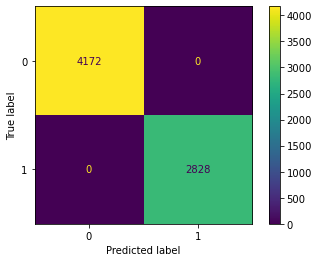

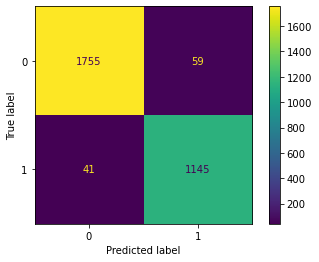

In [86]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(tree1,X_train,y_train))
print(plot_confusion_matrix(tree1,X_test,y_test))

In [87]:
tree1.tree_.max_depth

18

In [93]:
error_lst = list()
for i in range(1,tree1.tree_.max_depth):
    cur_tree = DecisionTreeClassifier(max_depth=i)
    cur_tree.fit(X_train,y_train)
    error_lst.append(1 -cur_tree.score(X_test,y_test))


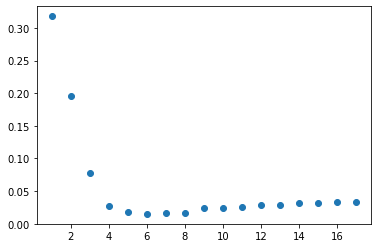

In [94]:
import matplotlib.pyplot as plt
plt.scatter(range(1,tree1.tree_.max_depth),error_lst)

In [95]:
np.argmin(error_lst)

5

In [106]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1,tree1.tree_.max_depth),
             'max_features':[0.2,0.4,0.6,0.8]}
cv = GridSearchCV(tree1,param_grid,cv=8)
cv.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 18),
                         'max_features': [0.2, 0.4, 0.6, 0.8]})

In [107]:
cv.best_params_

{'max_depth': 7, 'max_features': 0.8}

In [117]:
from sklearn.model_selection import cross_val_score
error_lst2 = list()
for i in range(1,tree1.tree_.max_depth):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    error_lst2.append(cross_val_score(model,X_train,y_train,scoring='accuracy',cv=8))

In [118]:
#find the best accuracy for each cross validation
for i in range(len(error_lst2)):
    error_lst2[i] = 1-np.mean(error_lst2[i])

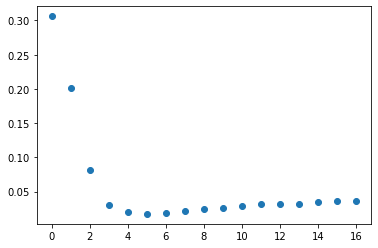

In [119]:
plt.scatter(range(len(error_lst2)),error_lst2)

In [120]:
np.argmin(error_lst2)

5

In [144]:
from sklearn.model_selection import validation_curve
train_scores, val_scores = validation_curve(tree1,X,y,'max_depth',range(1,tree1.tree_.max_depth),scoring='accuracy',cv=8)

C:\Anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=max_depth, param_range=range(1, 18) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [149]:
train_scores = np.apply_along_axis(np.mean,1,train_scores)
val_scores = np.apply_along_axis(np.mean,1,val_scores)

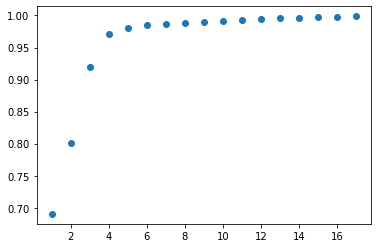

In [152]:
plt.scatter(range(1,tree1.tree_.max_depth),train_scores)

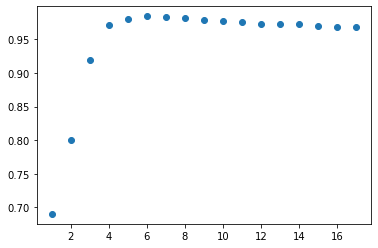

In [153]:
plt.scatter(range(1,tree1.tree_.max_depth),val_scores)

In [157]:
wine_df = pd.read_csv('winequality-red.csv',delimiter=';')

In [165]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [166]:
X = wine_df.iloc[:,:-1].values
y = wine_df.iloc[:,-1].values

In [168]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [172]:
wine_tree = DecisionTreeClassifier()
wine_tree.fit(X_train,y_train)

from sklearn.ensemble import RandomForestClassifier
wine_forest = RandomForestClassifier(n_estimators=25)
wine_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25)

In [173]:
tree_param_grid = {'max_depth':range(1,25),
             'max_features':[0.2,0.4,0.6,0.8]}
forest_param_grid = {'n_estimators':[5,10,15,20,25,30,35,40,50,100],
                    'max_depth':range(1,25),
                    'max_features':[0.2,0.4,0.6,0.8]}

In [174]:
tree_cv = GridSearchCV(wine_tree,tree_param_grid,cv=8)
tree_cv.fit(X_train,y_train)

forest_cv = GridSearchCV(wine_forest,forest_param_grid,cv=8)
forest_cv.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(n_estimators=25),
             param_grid={'max_depth': range(1, 25),
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 50,
                                          100]})

In [175]:
tree_cv.best_params_

{'max_depth': 10, 'max_features': 0.8}

In [176]:
forest_cv.best_params_

{'max_depth': 17, 'max_features': 0.2, 'n_estimators': 40}

In [177]:
wine_tree_opt = DecisionTreeClassifier(max_depth=10,max_features=0.8)
wine_forest_opt = RandomForestClassifier(max_depth=17,max_features=0.2,n_estimators=40)

In [188]:
wine_tree_opt.fit(X_train,y_train)
print('Decision Tree Train Acc:',accuracy_score(wine_tree_opt.predict(X_train),y_train))
print('Decision Tree Test Acc:',wine_tree_opt.score(X_test,y_test))
      
wine_forest_opt.fit(X_train,y_train)
print('Forest Train acc:',accuracy_score(wine_forest_opt.predict(X_train),y_train))
print('Forest Test acc:',wine_forest_opt.score(X_test,y_test))

Decision Tree Train Acc: 0.8765638031693077
Decision Tree Test Acc: 0.5425
Forest Train acc: 0.9991659716430359
Forest Test acc: 0.6675


In [186]:
accuracy_score(wine_tree_opt.predict(X_train),y_train)

0.9115929941618015

In [ ]:
accuracy_score()